In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../System Manager/Python/bank customer data.csv')

EDA 

In [3]:
df.head(8).style.background_gradient(cmap='Dark2_r')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
print('Number of rows in training set is:', df.shape[0])
print('Number of columns in training set is:', df.shape[1])

Number of rows in training set is: 11162
Number of columns in training set is: 17


In [6]:
print('number of null values in training set:',df.isnull().sum().sum())

number of null values in training set: 0


In [7]:
# Create a dictionary with the keys "yes" and "no" and the values 1 and 0, respectively.
mapping = {"yes": 1, "no": 0}

# Use the `replace()` function to apply the dictionary to the columns of yes and no values.
df[["default", "housing", "loan", "deposit"]] = df[["default", "housing", "loan", "deposit"]].replace({"yes": 1, "no": 0})


In [8]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,0,2343,1,0,5,1042,1,-1,0,1
1,56,0,45,0,0,5,1467,1,-1,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,1
3,55,0,2476,1,0,5,579,1,-1,0,1
4,54,0,184,0,0,5,673,2,-1,0,1


In [9]:
df_num.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,11162.000000,41.231948,11.913369,18.000000,32.000000,39.000000,49.000000,95.000000
default,11162.000000,0.015051,0.121761,0.000000,0.000000,0.000000,0.000000,1.000000
balance,11162.000000,1528.538524,3225.413326,-6847.000000,122.000000,550.000000,1708.000000,81204.000000
housing,11162.000000,0.473123,0.499299,0.000000,0.000000,0.000000,1.000000,1.000000
loan,11162.000000,0.130801,0.337198,0.000000,0.000000,0.000000,0.000000,1.000000
day,11162.000000,15.658036,8.420740,1.000000,8.000000,15.000000,22.000000,31.000000
duration,11162.000000,371.993818,347.128386,2.000000,138.000000,255.000000,496.000000,3881.000000
campaign,11162.000000,2.508421,2.722077,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,11162.000000,51.330407,108.758282,-1.000000,-1.000000,-1.000000,20.750000,854.000000
previous,11162.000000,0.832557,2.292007,0.000000,0.000000,0.000000,1.000000,58.000000


<Axes: >

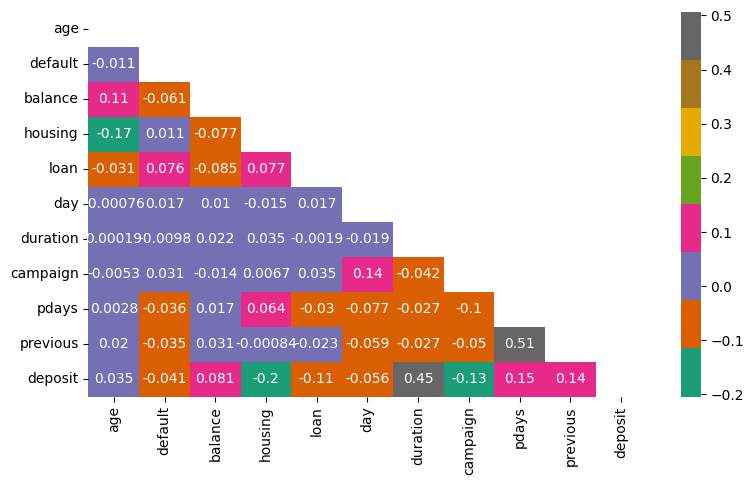

In [10]:
plt.figure(figsize=(9,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2')

In [11]:
correlation = pd.DataFrame(df_num.corr().deposit)
correlation.sort_values(by='deposit', ascending=False).style.background_gradient(cmap='coolwarm_r')

,deposit
deposit,1.000000
duration,0.451919
pdays,0.151593
previous,0.139867
balance,0.081129
age,0.034901
default,-0.040680
day,-0.056326
loan,-0.110580
campaign,-0.128081


In [12]:
deposit = df['deposit'].value_counts()
deposit_status = pd.DataFrame(deposit)
deposit_status['Percentage'] = deposit_status['count']/deposit_status['count'].sum() * 100
deposit_status

,count,Percentage
deposit,,
0,5873,52.616019
1,5289,47.383981


Text(0.5, 1.0, 'Deposit Class Distributions \n (0  || 1)')

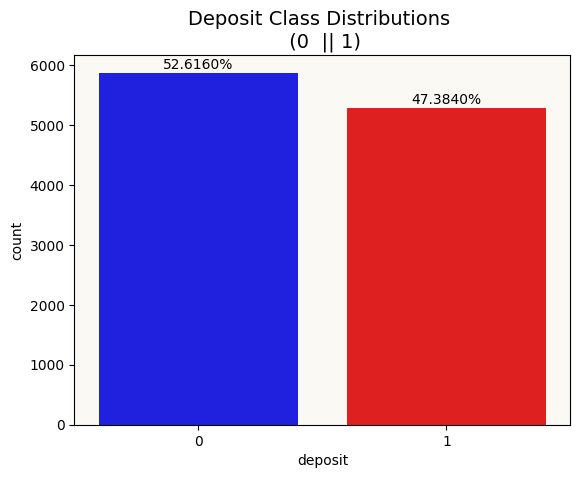

In [13]:
Total = len(df['deposit'])
colors = ['blue','red']

ax = sns.countplot(x = 'deposit', data = df, palette = colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100*p.get_height()/Total:.4f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Deposit Class Distributions \n (0  || 1)', fontsize=14)

In [14]:
def feature_plot(feature):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=feature, data=df, palette = 'cool_r')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [15]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10,5))
    ax = sns.catplot(x='deposit', col=feature, kind='count', data=df, palette='cool_r')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

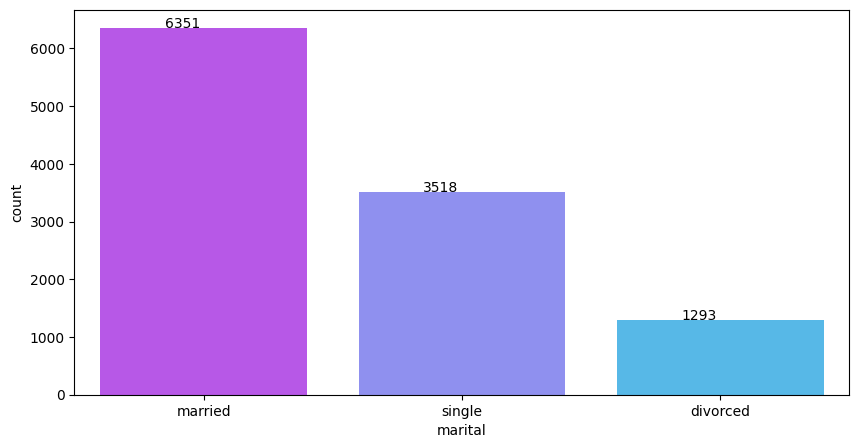

In [16]:
feature_plot('marital')

<Figure size 1000x500 with 0 Axes>

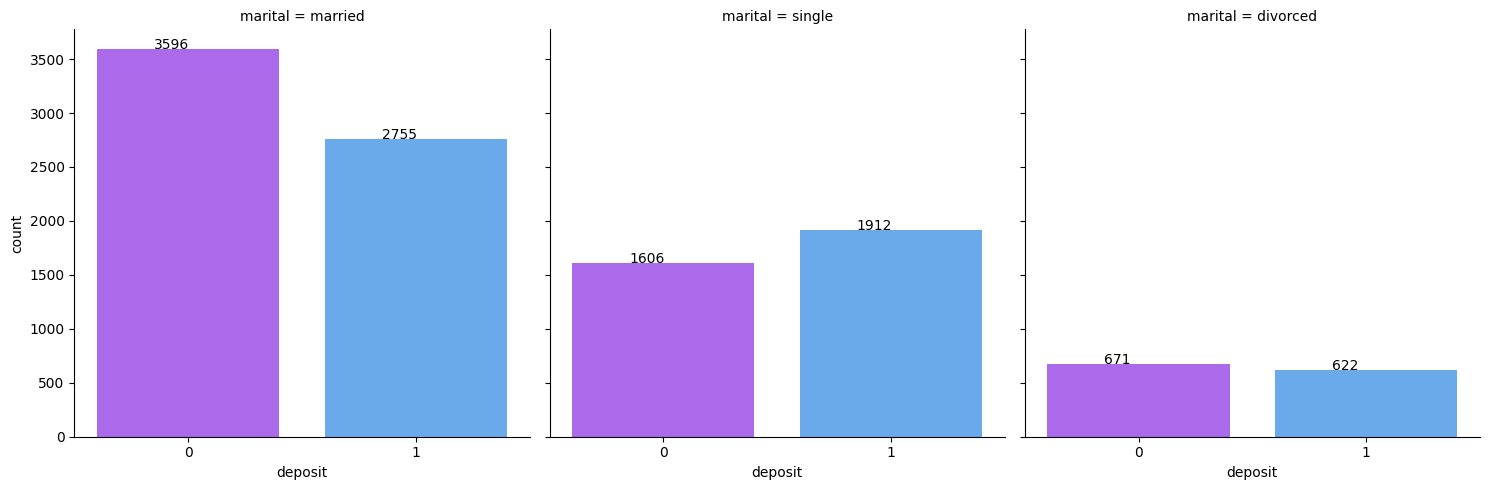

In [17]:
feature_plot_with_target('marital')

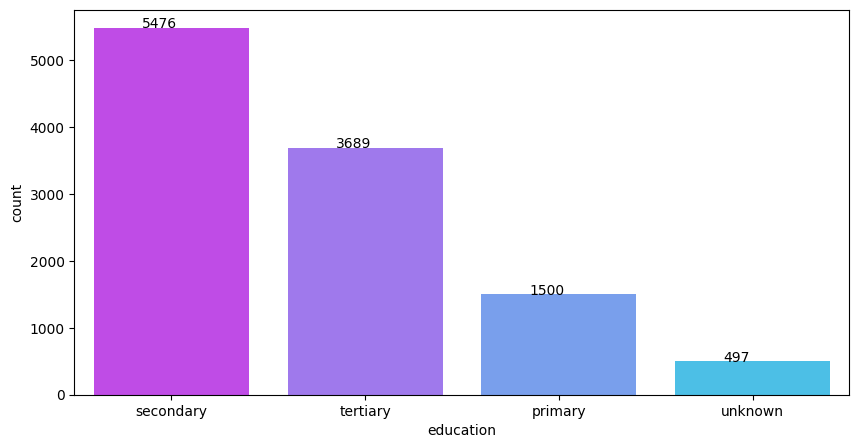

In [18]:
feature_plot('education')

<Figure size 1000x500 with 0 Axes>

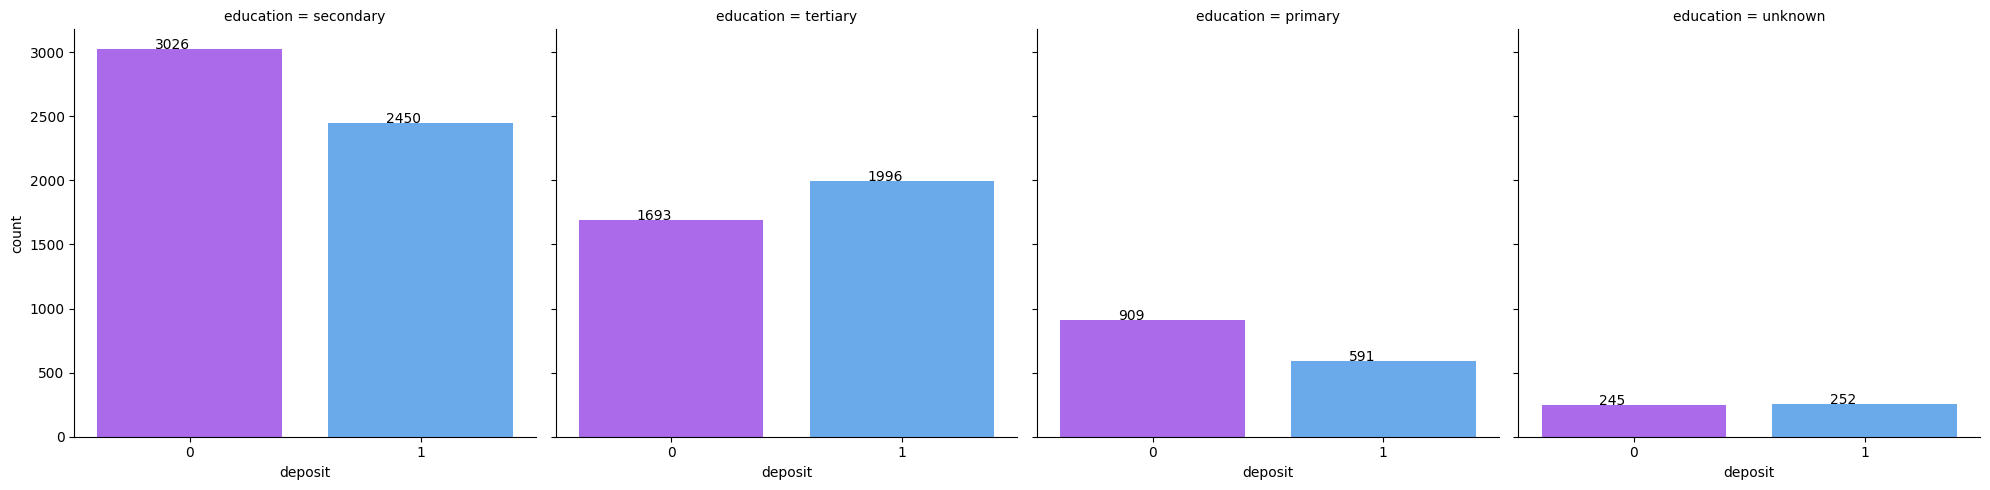

In [19]:
feature_plot_with_target('education')

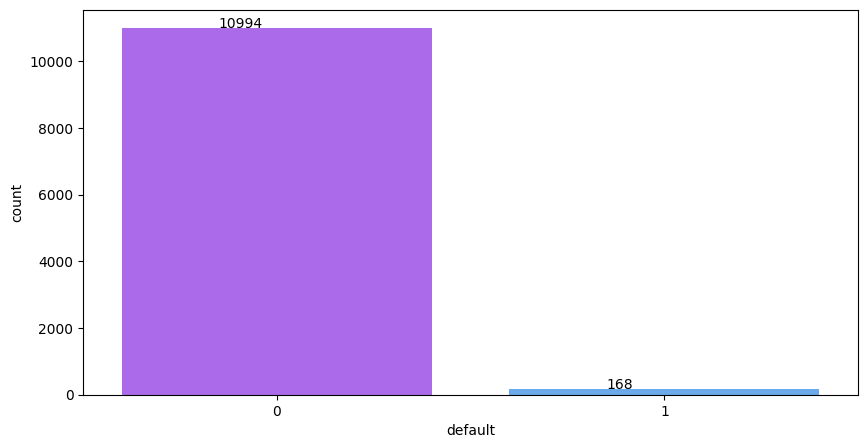

In [20]:
feature_plot('default')

<Figure size 1000x500 with 0 Axes>

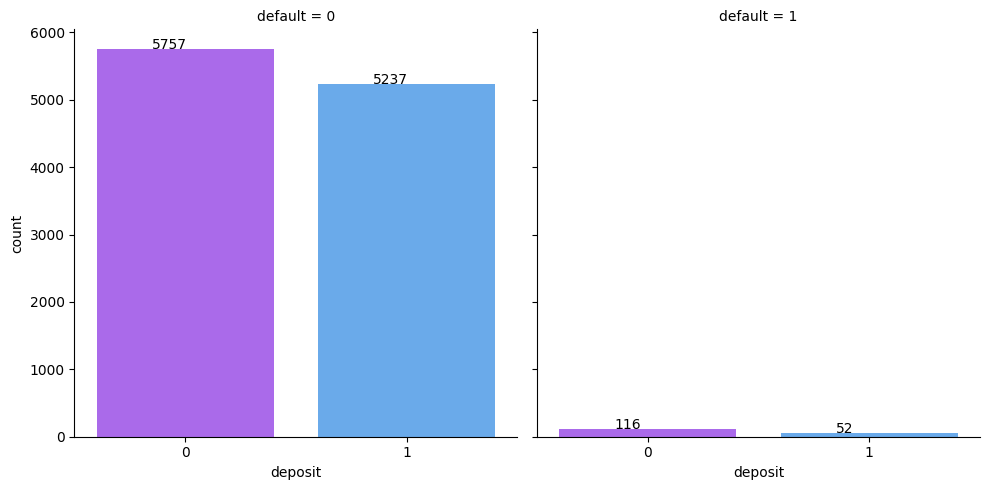

In [21]:
feature_plot_with_target('default')

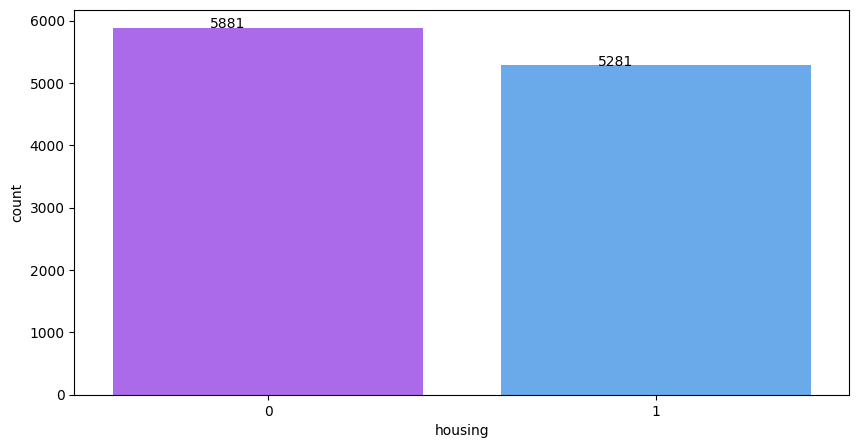

In [22]:
feature_plot('housing')

<Figure size 1000x500 with 0 Axes>

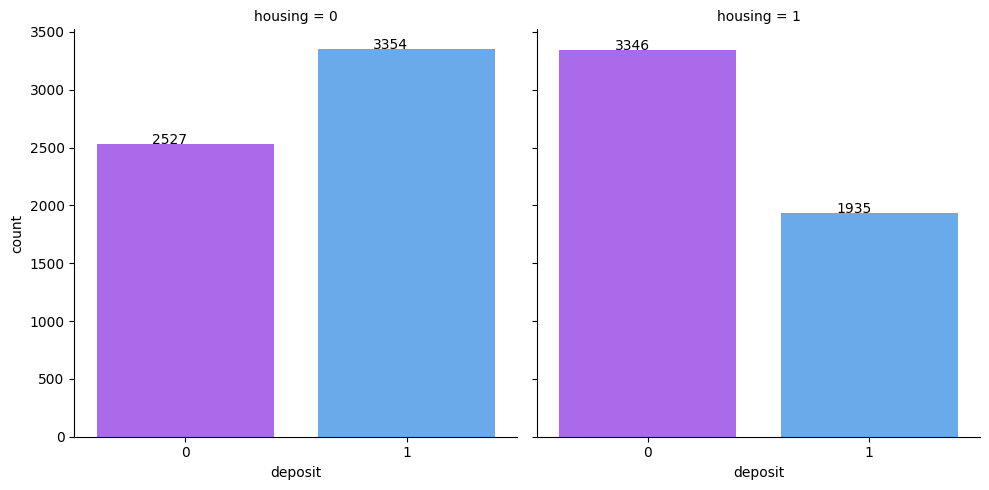

In [23]:
feature_plot_with_target('housing')

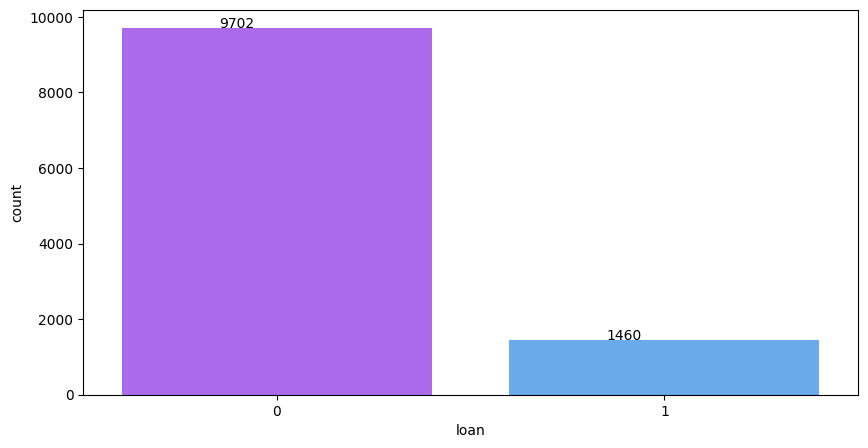

In [24]:
feature_plot('loan')

<Figure size 1000x500 with 0 Axes>

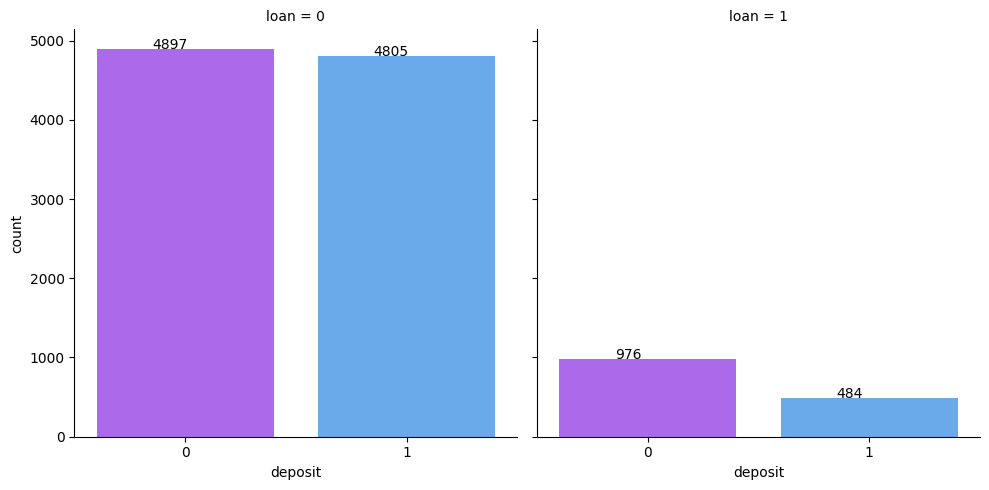

In [25]:
feature_plot_with_target('loan')

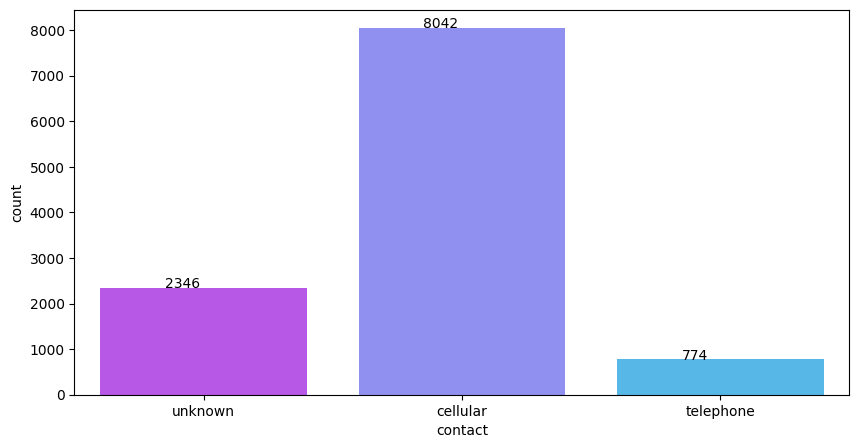

In [26]:
feature_plot('contact')

<Figure size 1000x500 with 0 Axes>

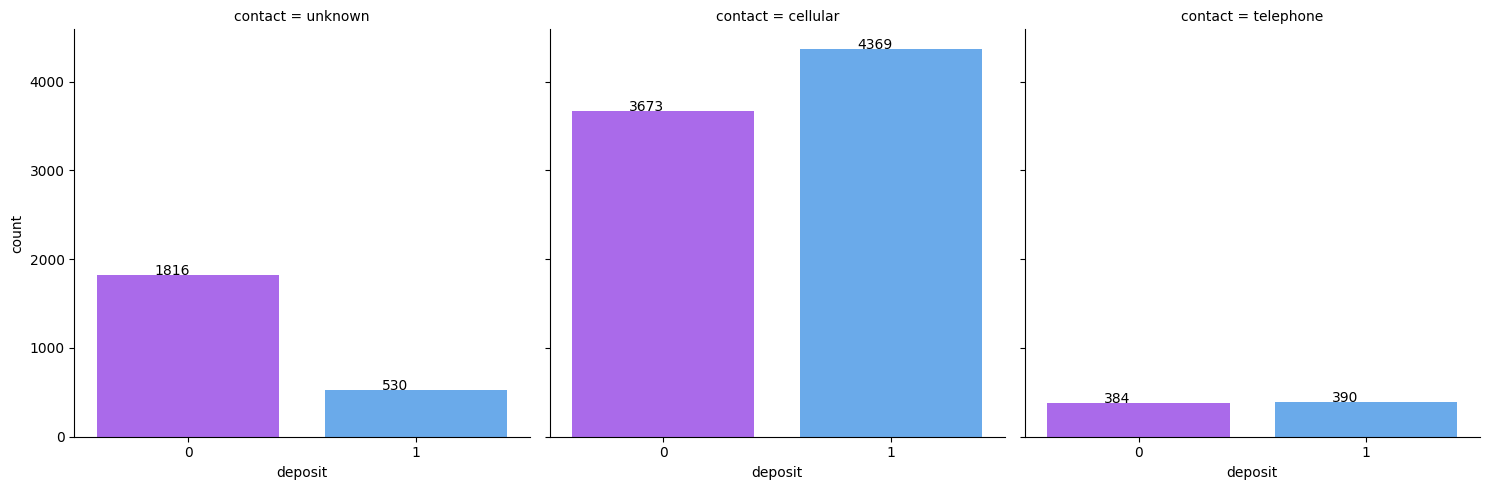

In [27]:
feature_plot_with_target('contact')

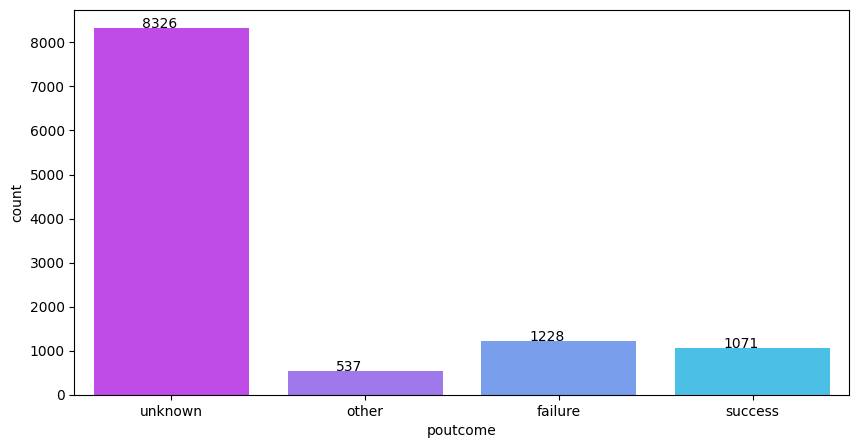

In [28]:
feature_plot('poutcome')

<Figure size 1000x500 with 0 Axes>

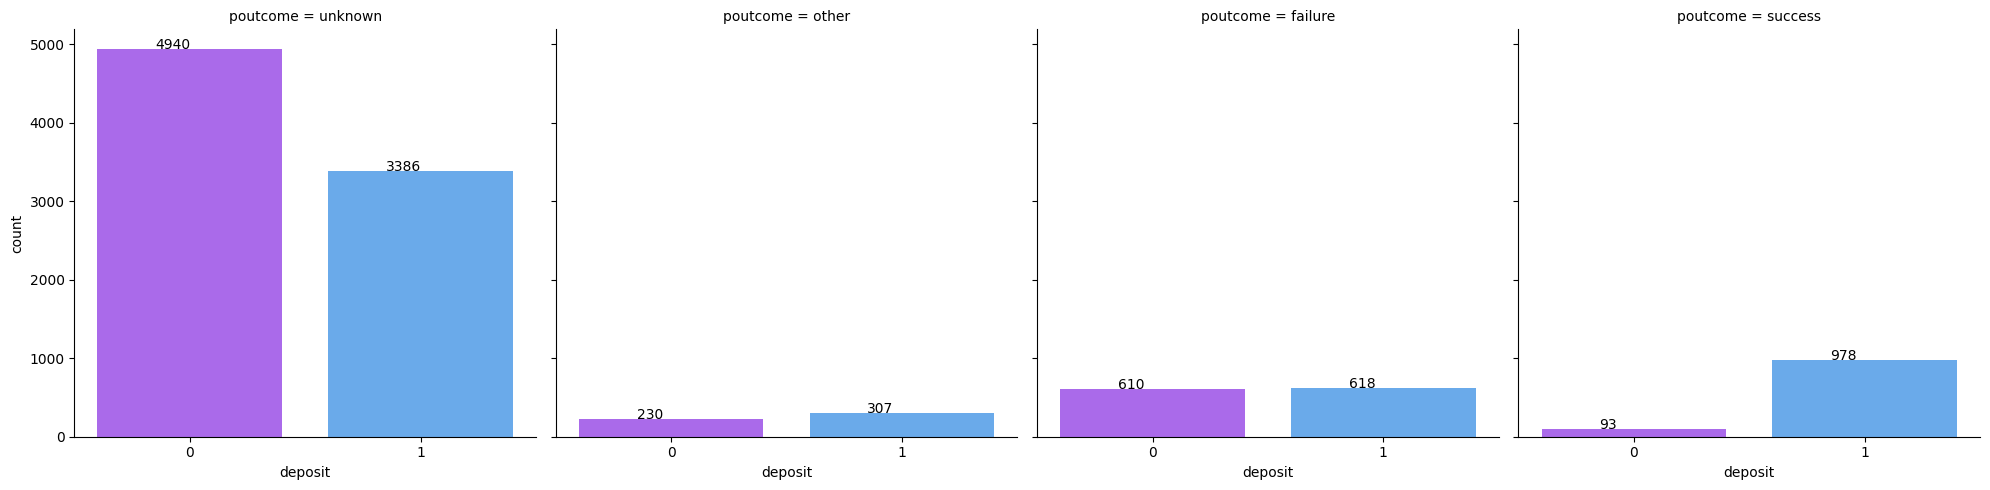

In [29]:
feature_plot_with_target('poutcome')

In [30]:
def hist_feat(feature):
    plt.figure(figsize=(10,5))
    sns.histplot(df[feature].dropna(), kde=True, color='purple',bins=30)

In [31]:
def dis_feat_with_target(feature):
    plt.figure(figsize=(8,5))
    sns.displot(data=df, x=feature, hue='deposit', kind='kde')

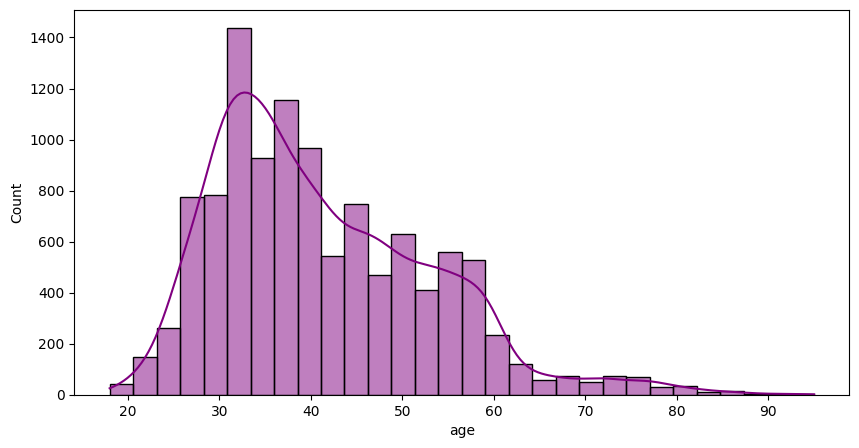

In [32]:
hist_feat('age')

<Figure size 800x500 with 0 Axes>

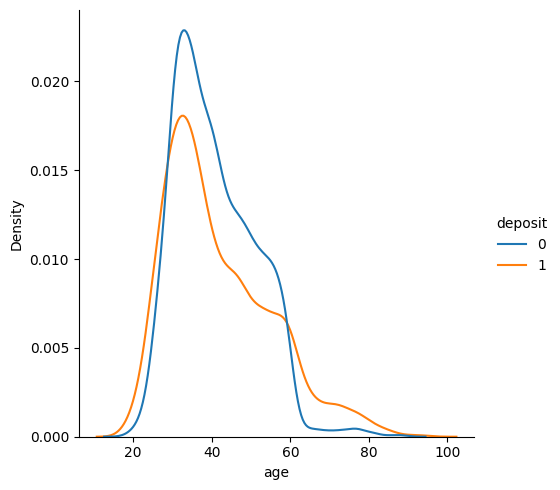

In [33]:
dis_feat_with_target('age')

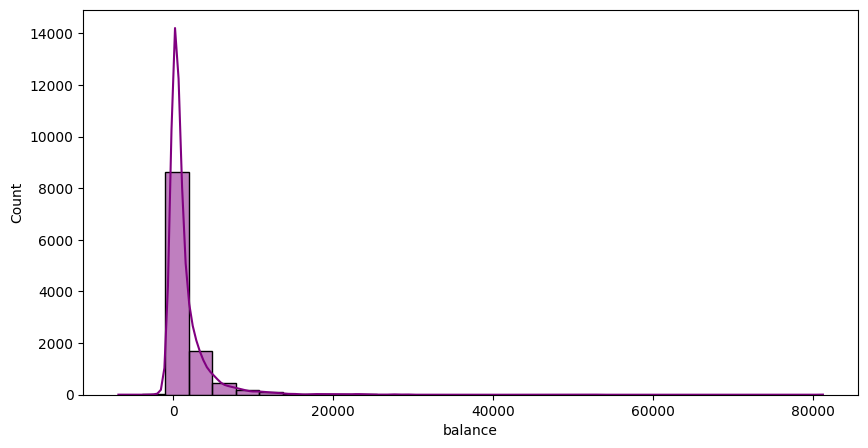

In [34]:
hist_feat('balance')

<Figure size 800x500 with 0 Axes>

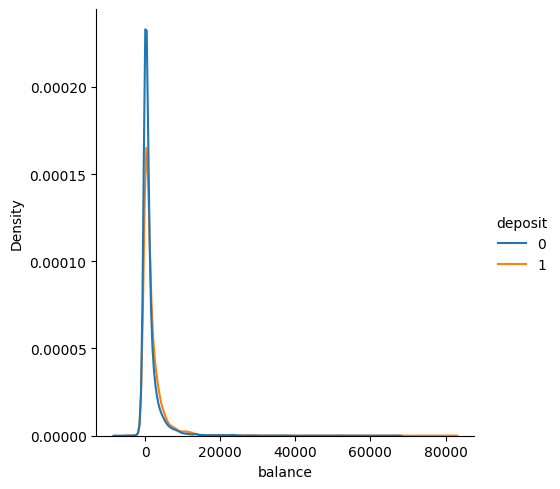

In [35]:
dis_feat_with_target('balance')

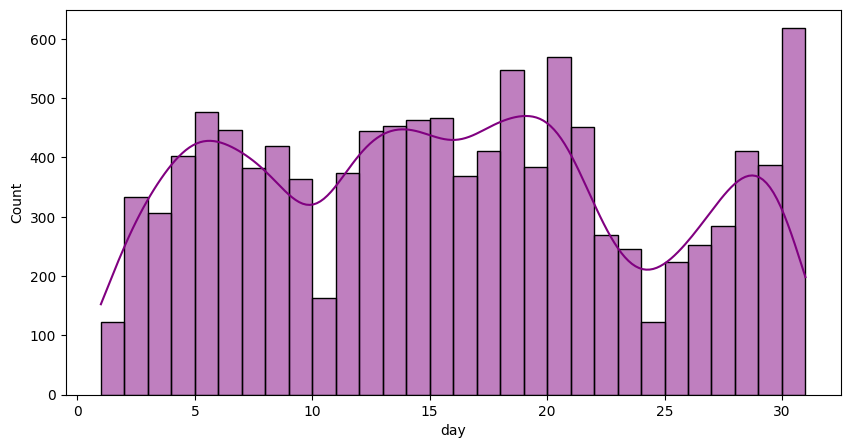

In [36]:
hist_feat('day')

<Figure size 800x500 with 0 Axes>

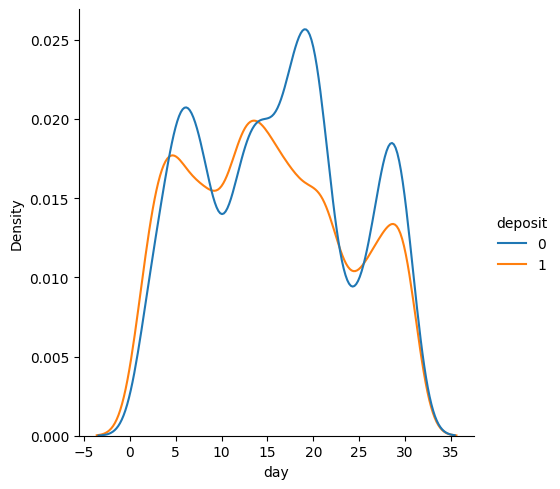

In [37]:
dis_feat_with_target('day')

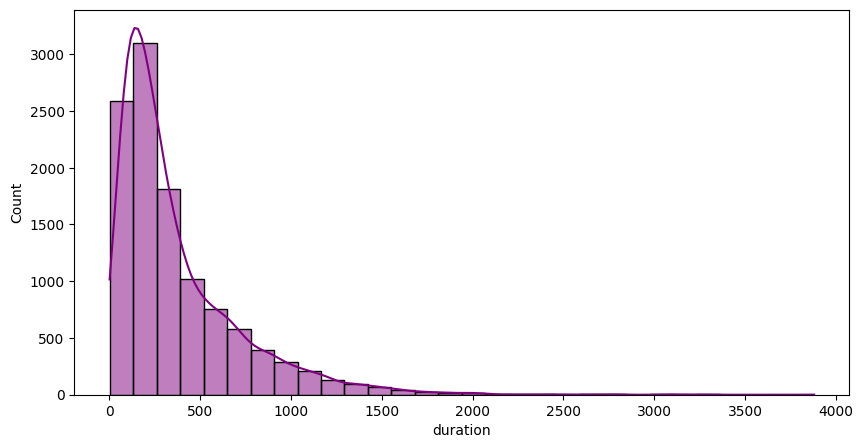

In [38]:
hist_feat('duration')

<Figure size 800x500 with 0 Axes>

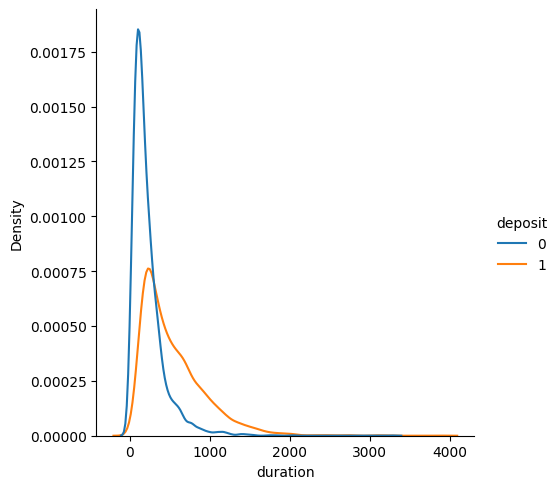

In [39]:
dis_feat_with_target('duration')

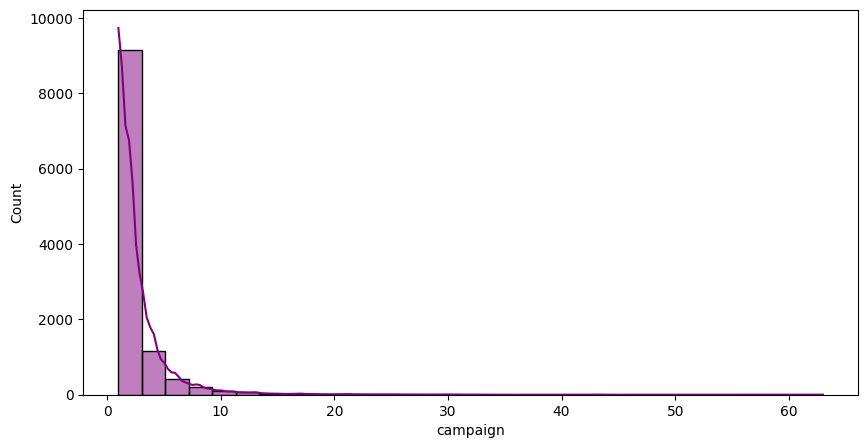

In [40]:
hist_feat('campaign')

<Figure size 800x500 with 0 Axes>

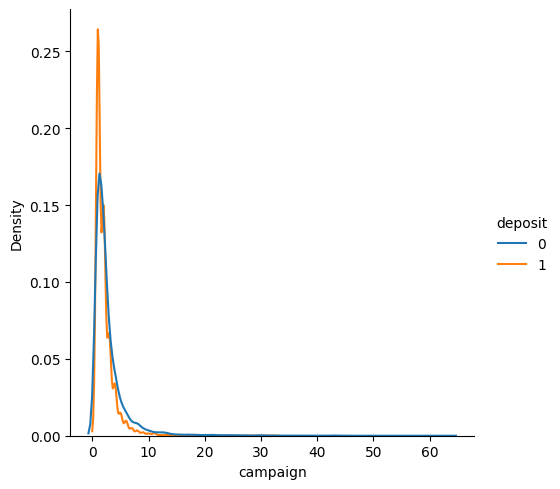

In [41]:
dis_feat_with_target('campaign')

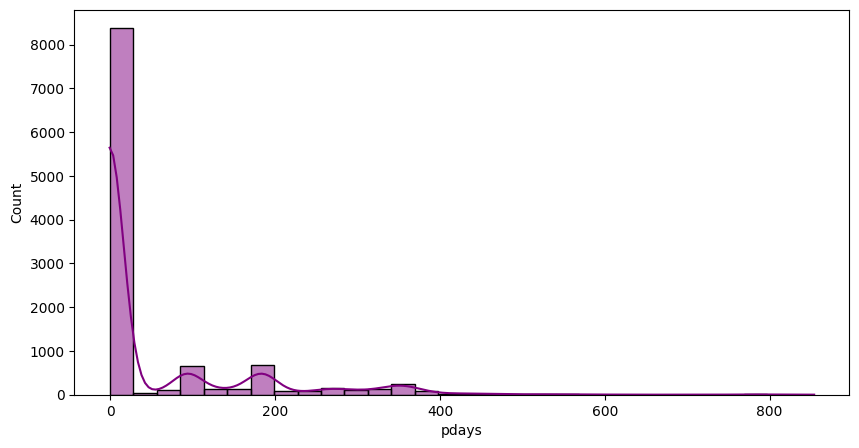

In [42]:
hist_feat('pdays')

<Figure size 800x500 with 0 Axes>

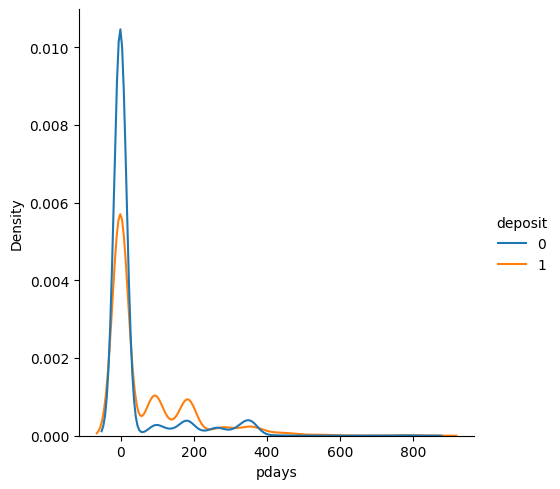

In [43]:
dis_feat_with_target('pdays')

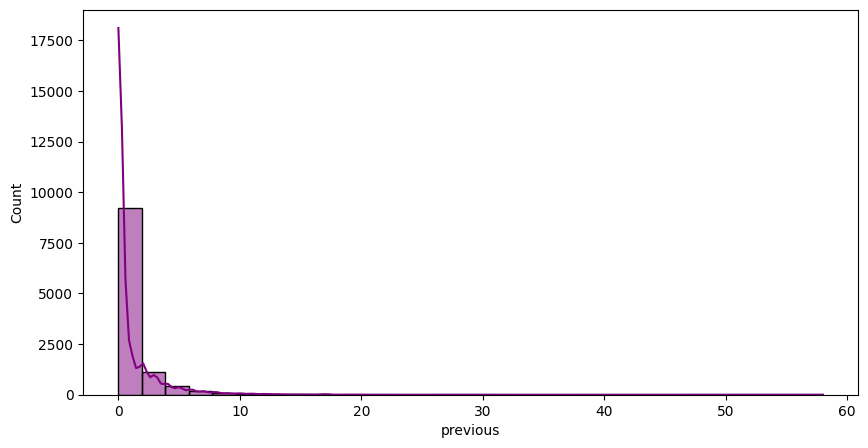

In [44]:
hist_feat('previous')

<Figure size 800x500 with 0 Axes>

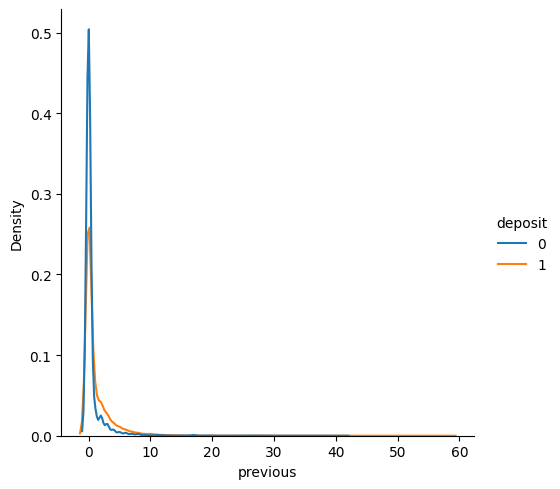

In [45]:
dis_feat_with_target('previous')

In [46]:
def feature_plot(feature):
    sns.countplot(y = feature, data=df, order=df[feature].value_counts().index)
    plt.xticks(rotation=0)
    plt.title(feature, fontsize=14)     

In [47]:
def feature_plot_with_target(feature):
    sns.countplot(y=feature, hue='deposit', data=df, order=df[feature].value_counts().index, palette='cool_r')
    plt.title(feature, fontsize=14)
    plt.legend(title='deposit', loc='lower right', labels=['0', '1'])

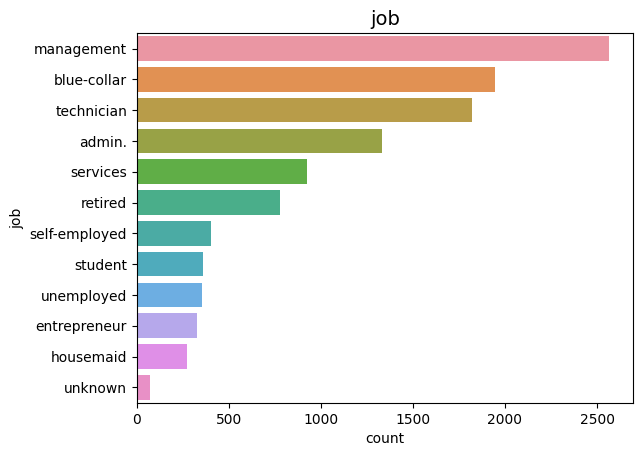

In [48]:
feature_plot('job')

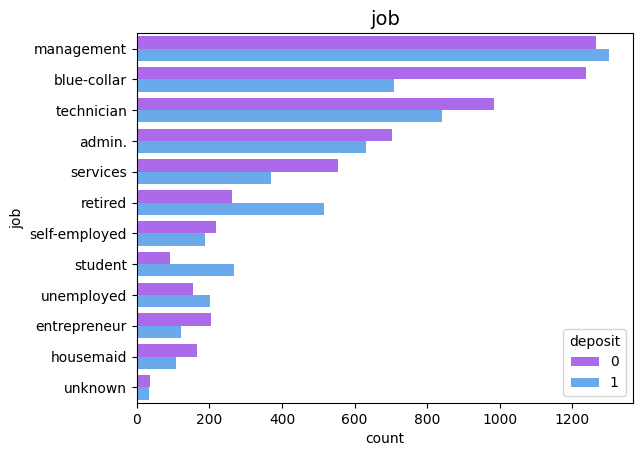

In [49]:
feature_plot_with_target('job')

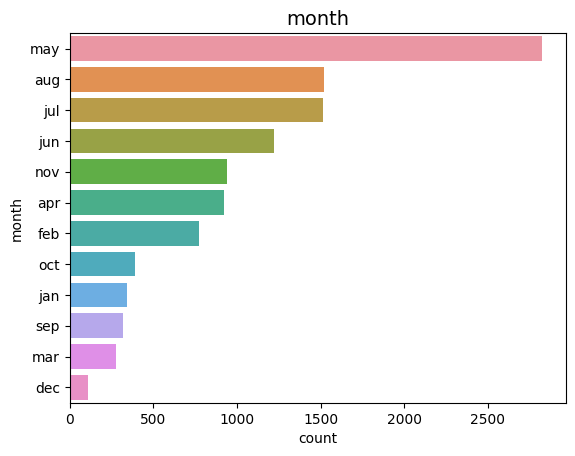

In [50]:
feature_plot('month')

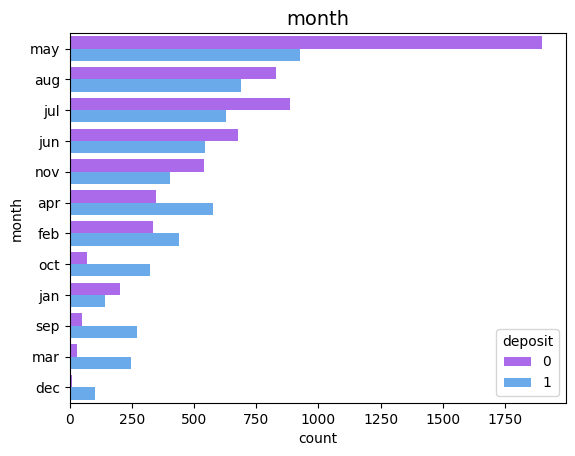

In [51]:
feature_plot_with_target('month')

Principal component analysis
1.Select features for machine learning

In [52]:
from sklearn import preprocessing

In [53]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

encoded_job = label_encoder.fit_transform(df["job"])
encoded_education = label_encoder.fit_transform(df["education"])
encoded_marital = label_encoder.fit_transform(df["marital"])
encoded_default = label_encoder.fit_transform(df["default"])
encoded_housing = label_encoder.fit_transform(df["housing"])
encoded_loan = label_encoder.fit_transform(df["loan"])
encoded_contact = label_encoder.fit_transform(df["contact"])
encoded_month = label_encoder.fit_transform(df["month"])
encoded_poutcome = label_encoder.fit_transform(df["poutcome"])

In [54]:
data = {
    "encoded_job": encoded_job,
    "encoded_education": encoded_education,
    "encoded_marital": encoded_marital,
    "encoded_default": encoded_default,
    "encoded_housing": encoded_housing,
    "encoded_loan": encoded_loan,
    "encoded_contact": encoded_contact,
    "encoded_month": encoded_month,
    "encoded_poutcome": encoded_poutcome
}

combined_df = pd.DataFrame(data)

In [55]:
# List of columns to drop
columns_to_drop = ["job", "education", "marital", "default", "housing", "loan", "contact", "month", "poutcome"]

# Drop the columns from the DataFrame
new_df = df.drop(columns_to_drop, axis=1)

In [56]:
concatenated_df = pd.concat([new_df, combined_df], axis=1)
concatenated_df.drop('deposit',axis=1, inplace=True)
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int64
 1   balance            11162 non-null  int64
 2   day                11162 non-null  int64
 3   duration           11162 non-null  int64
 4   campaign           11162 non-null  int64
 5   pdays              11162 non-null  int64
 6   previous           11162 non-null  int64
 7   encoded_job        11162 non-null  int32
 8   encoded_education  11162 non-null  int32
 9   encoded_marital    11162 non-null  int32
 10  encoded_default    11162 non-null  int64
 11  encoded_housing    11162 non-null  int64
 12  encoded_loan       11162 non-null  int64
 13  encoded_contact    11162 non-null  int32
 14  encoded_month      11162 non-null  int32
 15  encoded_poutcome   11162 non-null  int32
dtypes: int32(6), int64(10)
memory usage: 1.1 MB


In [57]:
# Get the correlation between features in concatenated_df
correlation = concatenated_df

# Get the correlation between features in df_num and deposit
deposit_correlation = df_num['deposit']

# Merge the two correlation matrices
merged_correlation = pd.concat([correlation, deposit_correlation ], axis=1)

# Display the sorted correlation matrix
final = pd.DataFrame(merged_correlation.corr().deposit)
final.sort_values(by='deposit', ascending=False).style.background_gradient(cmap='coolwarm_r')

,deposit
deposit,1.000000
duration,0.451919
pdays,0.151593
previous,0.139867
encoded_education,0.095948
balance,0.081129
encoded_marital,0.067610
encoded_job,0.063395
age,0.034901
encoded_month,-0.037121


In [58]:
merged_correlation

selected_columns = merged_correlation.drop('deposit', axis=1)

selected_columns

,age,balance,day,duration,campaign,pdays,previous,encoded_job,encoded_education,encoded_marital,encoded_default,encoded_housing,encoded_loan,encoded_contact,encoded_month,encoded_poutcome
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,2,8,3
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,2,8,3
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,2,8,3
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,2,8,3
4,54,184,5,673,2,-1,0,0,2,1,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,2,0,1,0,0,0,3
11158,39,733,16,83,4,-1,0,7,1,1,0,0,0,2,6,3
11159,32,29,19,156,2,-1,0,9,1,2,0,0,0,0,1,3
11160,43,0,8,9,2,172,5,9,1,1,0,0,1,0,8,0


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [60]:
# Create a subset DataFrame with the selected columns
data_subset = selected_columns

# Perform feature scaling on the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Retrieve the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Principal Component {i + 1}: {ratio:.4f}")

Explained Variance Ratio for Principal Component 1: 0.1511
Explained Variance Ratio for Principal Component 2: 0.1029
Explained Variance Ratio for Principal Component 3: 0.0952
Explained Variance Ratio for Principal Component 4: 0.0750
Explained Variance Ratio for Principal Component 5: 0.0686
Explained Variance Ratio for Principal Component 6: 0.0630
Explained Variance Ratio for Principal Component 7: 0.0613
Explained Variance Ratio for Principal Component 8: 0.0572
Explained Variance Ratio for Principal Component 9: 0.0566
Explained Variance Ratio for Principal Component 10: 0.0543
Explained Variance Ratio for Principal Component 11: 0.0525
Explained Variance Ratio for Principal Component 12: 0.0473
Explained Variance Ratio for Principal Component 13: 0.0387
Explained Variance Ratio for Principal Component 14: 0.0338
Explained Variance Ratio for Principal Component 15: 0.0305
Explained Variance Ratio for Principal Component 16: 0.0119


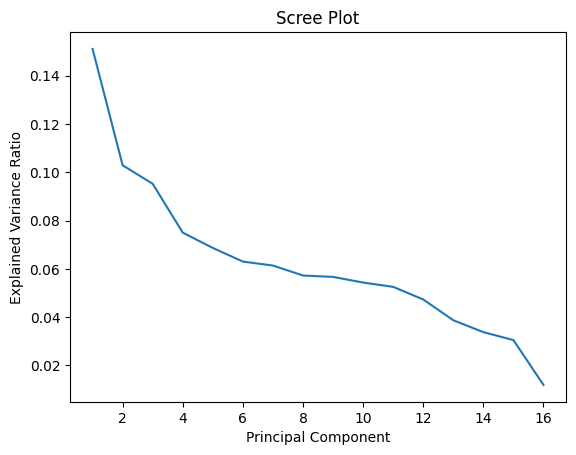

In [61]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

Predictive modelling

In [62]:
outcome = pd.DataFrame(pca_result)
outcome = outcome.iloc[:,:14]

In [63]:
# Create a PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(outcome)

# Transform the data
transformed_data = pca.transform(outcome)

# Print the transformed data
transformed = pd.DataFrame(transformed_data)
transformed 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.249387,2.356254,0.588250,1.836547,-1.000920,0.890662,0.634242,0.004733,0.802095,0.563482,-0.700636,-0.556613,0.765516,-0.302578
1,-1.273513,1.471351,0.871302,1.799324,-1.834763,1.266298,1.054500,-0.462664,0.989969,0.132279,-0.583763,-2.271066,0.831789,-0.503114
2,-1.155771,1.237918,-0.591224,2.036302,-1.113646,0.938779,1.971204,-1.785803,0.333619,1.124951,0.549970,0.001454,0.595753,-0.102485
3,-1.119969,1.551422,0.319153,1.820885,-0.229511,-0.492855,0.629930,-0.848990,0.157914,0.937722,0.458708,0.267601,0.632130,-0.217185
4,-1.145694,0.931231,0.582428,1.399912,-0.645986,-0.410590,0.031894,0.011357,0.507794,0.509531,-1.397039,-1.979792,0.855245,-0.463297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.602733,-0.098940,-0.884054,-0.803792,-0.896883,1.111907,-1.557178,0.523563,1.009633,-1.259905,0.752911,1.371550,0.435631,0.178204
11158,-1.296414,0.043591,0.122437,0.246487,0.960752,-0.992946,-0.421968,-0.712585,0.226656,0.240908,0.830671,-0.680157,0.748467,-0.274186
11159,-0.396429,-2.271428,-0.687272,-0.402042,-0.230115,-0.309881,-0.654495,-0.521400,0.157250,-0.599986,1.308422,0.367983,0.307487,-0.032520
11160,3.076887,0.615495,0.399796,-1.278828,-0.456694,-1.419871,0.197163,-0.251653,-2.154790,0.894298,1.514814,-0.998830,-0.167186,0.157868


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
# Define the dependent variable
y = df["deposit"]

# Define the independent variables
x = transformed

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Fit the model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7951627351448194


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
# Create a confusion matrix object
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix:')
print(cm)

Confusion matrix:
[[1454  325]
 [ 361 1209]]


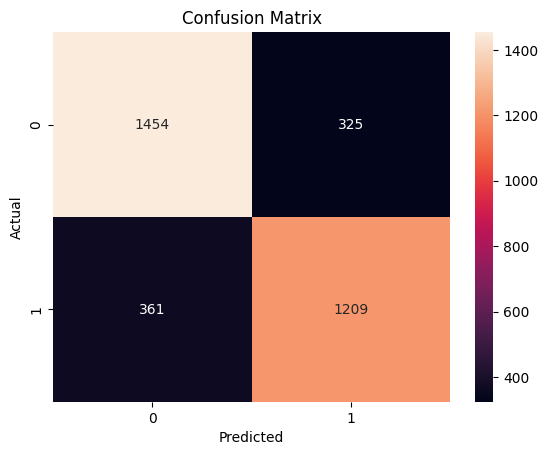

In [68]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# Define the dependent variable
y = df["deposit"]

# Define the independent variables
x = concatenated_df

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Fit the model
model = LogisticRegression(solver= 'newton-cg')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7945655419528217


In [70]:
# Create a confusion matrix object
cm = confusion_matrix(y_test, y_pred)

print('confusion matrix:')
print(cm)

confusion matrix:
[[1468  322]
 [ 366 1193]]


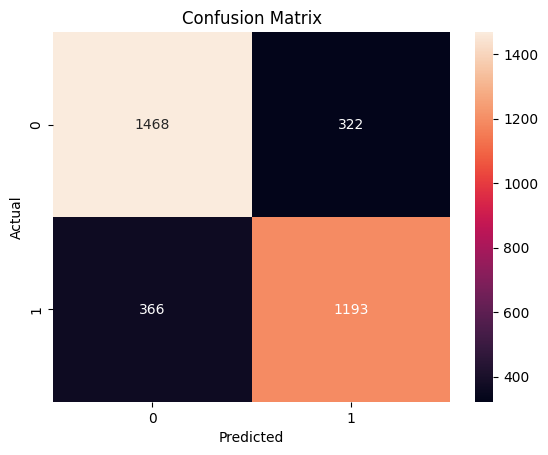

In [71]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()